In [2]:
import warnings

# 忽略特定类型的警告
warnings.filterwarnings("ignore", message="The parameter 'tokenizer' will not be used since 'analyzer' != 'word'", category=UserWarning)
warnings.filterwarnings("ignore", message="The parameter 'token_pattern' will not be used since 'tokenizer' is not None")


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import jieba

all_file = './data/all.csv'
all_data = pd.read_csv(all_file, header=None,names=['label', 'text'])

def chinese_tokenizer(text):
    return [list(jieba.cut(text))]

# 初始化vectorizer, 使用的是bag-of-word 最基礎的 CountVectorizer
vectorizer = CountVectorizer(analyzer='char',  tokenizer=chinese_tokenizer)

# 將 text 轉換成 bow 格式
corpus = all_data['text'].str.replace(' ', '').values
text = vectorizer.fit_transform(corpus)

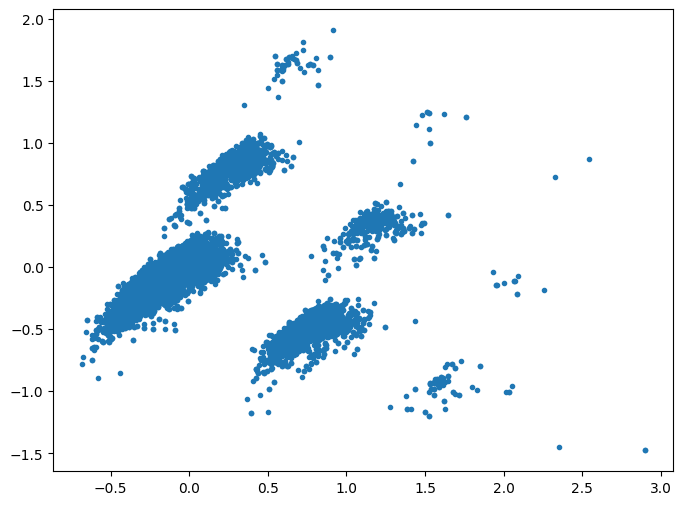

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(text.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.')


4


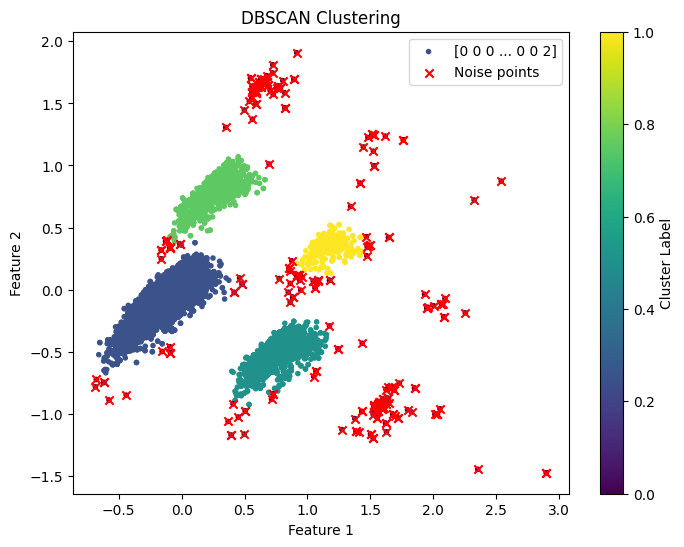

Silhouette Score: 0.7925304333034734


In [5]:

dbscan = DBSCAN(eps=0.1, min_samples=40)
labels = dbscan.fit_predict(reduced_data)

# 提取核心点、边界点和噪声点
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
noise_mask = dbscan.labels_ == -1

num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(num_clusters)

# 绘制聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='.', label=labels)
plt.scatter(reduced_data[noise_mask, 0], reduced_data[noise_mask, 1], c='red', marker='x', label='Noise points')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='Cluster Label')
plt.show()
silhouette_avg = silhouette_score(reduced_data, dbscan.labels_)
print("Silhouette Score:", silhouette_avg)

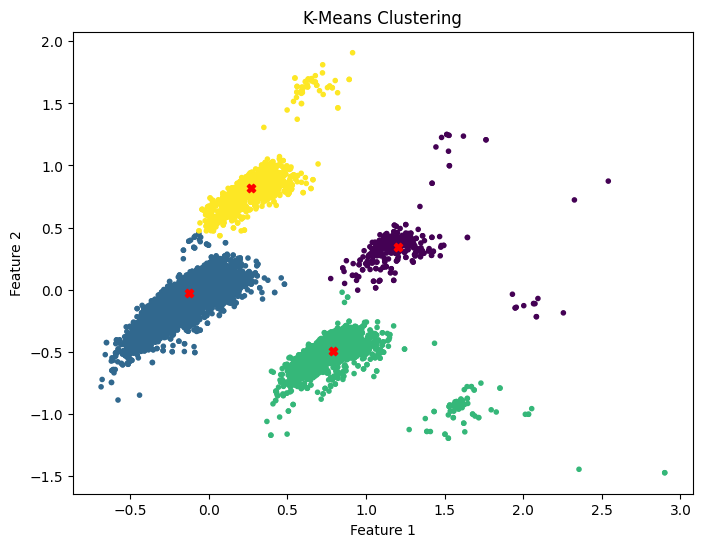

Silhouette Score: 0.7977792411698893


In [11]:
from sklearn.cluster import KMeans
silhouette_avg = 0
while(silhouette_avg<0.65):
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(reduced_data)
    centers = kmeans.cluster_centers_
    silhouette_avg = silhouette_score(reduced_data, kmeans.labels_)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='.')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()
print("Silhouette Score:", silhouette_avg)